<a href="https://www.kaggle.com/code/samanashoori/danish-house-market-analysis?scriptVersionId=218123199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Hello and Welcome to my first attempt at a Jupyter style python project. **

In the past I have done most of my python coding in Spyder , Visual Studio Code and Pycharm but I know for data Jupyter is a highly accepted format. So here goes!

I am using the Danish Housing Price Dataset that is most likely linked to this notebook. I will be using the parquet instead of the csv in the file because I want to work with a data file format - I have never worked with before.

Now time to print the first data point in the dataset to understand what kind of file we are working with. so far so good!

In [1]:
import pyarrow.parquet as pq
import pandas as pd

df = pq.read_table(source="/kaggle/input/danish-residential-housing-prices-1992-2024/DKHousingPrices.parquet").to_pandas()
print(df.head())

        date quarter  house_id   house_type    sales_type  year_build  \
0 2024-10-26  2024Q4         0        Villa  regular_sale        1974   
1 2024-10-26  2024Q4         2  Summerhouse  regular_sale        1956   
2 2024-10-26  2024Q4         1         Farm  regular_sale        1955   
3 2024-10-25  2024Q4         3    Apartment   family_sale        1945   
4 2024-10-25  2024Q4         4        Villa  regular_sale        1967   

   purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0         4350000                                  0.0         5  215.0   
1          450000                                  0.0         3   36.0   
2         6600000                                  0.0         3  180.0   
3         1495000                                  0.0         2   64.0   
4         3375000                                  0.0         5  176.0   

      sqm_price                     address  zip_code        city  \
0  20232.558594               Kildevangen

In [2]:
#I kind of want to see what all the columns are to see what I am working with.
print(df.columns.values)

['date' 'quarter' 'house_id' 'house_type' 'sales_type' 'year_build'
 'purchase_price' '%_change_between_offer_and_purchase' 'no_rooms' 'sqm'
 'sqm_price' 'address' 'zip_code' 'city' 'area' 'region'
 'nom_interest_rate%' 'dk_ann_infl_rate%'
 'yield_on_mortgage_credit_bonds%']


In [3]:
#Okay now I can see all the columns might be worth seeing just one row with all the columns showing
print(df.iloc[0])

date                                   2024-10-26 00:00:00
quarter                                             2024Q4
house_id                                                 0
house_type                                           Villa
sales_type                                    regular_sale
year_build                                            1974
purchase_price                                     4350000
%_change_between_offer_and_purchase                    0.0
no_rooms                                                 5
sqm                                                  215.0
sqm_price                                     20232.558594
address                                      Kildevangen 5
zip_code                                              8382
city                                              Hinnerup
area                                    East & mid jutland
region                                             Jutland
nom_interest_rate%                                     3

In [4]:
#I am noticing that the last two fields are pretty empty quite a bit so  I want to check the percentage of nulls in those two columns
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)
count_row = df.shape[0]#Yoinked this code from geeksforgeeks to count rows.
print(count_row)

NaN count per column:
date                                      0
quarter                                   0
house_id                                  0
house_type                                0
sales_type                                0
year_build                                0
purchase_price                            0
%_change_between_offer_and_purchase       0
no_rooms                                  0
sqm                                       2
sqm_price                                 2
address                                   0
zip_code                                  0
city                                      0
area                                      0
region                                    0
nom_interest_rate%                        0
dk_ann_infl_rate%                      1193
yield_on_mortgage_credit_bonds%        1193
dtype: int64
1507908


In [5]:
#so out of 150k rows theres only 1193 nulls and a few on the sqm /sqm price - so time to drop those mf rows
df = df.dropna()
count_row = df.shape[0]
print(count_row)
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

1506713
NaN count per column:
date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
city                                   0
area                                   0
region                                 0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
dtype: int64


Lets make a graph - First thing - lets make it simple. Do a line graph of houses built per year.

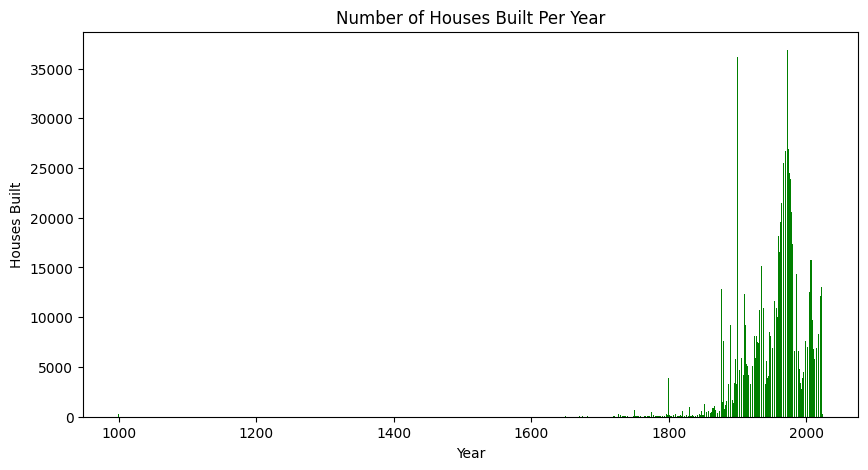

In [6]:
from matplotlib import pyplot as plt

import numpy as np
houses_per_year = df.groupby('year_build')['house_id'].count()
x_axis = houses_per_year.index
y_axis = houses_per_year.values
# Plotting
plt.figure(figsize=(10, 5))  # make it nice and wide.
plt.bar(x_axis, y_axis, color='green')
plt.xlabel('Year')
plt.ylabel('Houses Built')
plt.title('Number of Houses Built Per Year')
plt.show()

**Improving The Graph**
So - As you can see - there were some houses built in 1000 which makes the graph look rather scuffed.
Lets work around this.

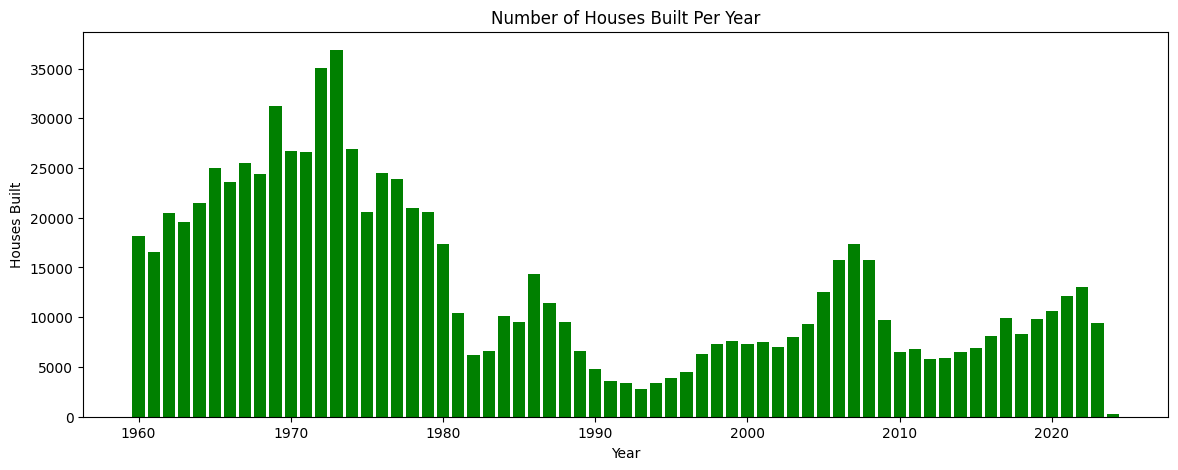

In [7]:
df = df[df['year_build'] >= 1960] #Used to be 1900 but changed to be 1960 as I am a zoomer and cannot relate to 1900
houses_per_year = df.groupby('year_build')['house_id'].count()
x_axis = houses_per_year.index
y_axis = houses_per_year.values
# Plotting
plt.figure(figsize=(14, 5))  # make it nice and wide.
plt.bar(x_axis, y_axis, color='green')
plt.xlabel('Year')
plt.ylabel('Houses Built')
plt.title('Number of Houses Built Per Year')
plt.show()

**Plotting Number of Houses Per Year by city**
I think if we broke it down by the ciy we can see some interesting insights
Lettuce begin

In [8]:
#set the size
from ipywidgets import interact
plt.figure(figsize=(12,12))
print(df['city'].nunique()) #629 
print(df['area'].nunique()) #8 areas
print(df['region'].nunique()) # 4 regions
def plot_area(area):
    plt.figure(figsize=(10, 6))
    # Filter the data for the selected area
    group = df[df['area'] == area]
    
    # Group by year and count house IDs
    counts_per_year = group.groupby('year_build')['house_id'].count()
    
    # Plot the data
    plt.plot(counts_per_year.index, counts_per_year.values, marker='o', label=f'Area: {area}')
    plt.xlabel('Year')
    plt.ylabel('Count of House IDs')
    plt.title(f'Number of Houses Per Year in {area}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a dropdown menu for areas
unique_area = sorted(df['area'].unique())
interact(plot_area, area=unique_area)

624
8
4


interactive(children=(Dropdown(description='area', options=('Bornholm', 'Capital, Copenhagen', 'East & mid jut…

<function __main__.plot_area(area)>

In [9]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact

def plot_area(area):
    group = df[df['area'] == area]
    counts_per_year = group.groupby('year_build')['house_id'].count()
    avg_price_per_year = group.groupby('year_build').agg(
        avg_price=('purchase_price', 'mean')
    ).reset_index()

    merged_df = pd.merge(counts_per_year, avg_price_per_year, on='year_build')

    fig = px.line(
        merged_df,
        x='year_build',
        y='house_id',
        title=f"Number of Houses Per Year in {area}",
        labels={"year_build": "Year", "house_id": "Number of Houses Built"},
        hover_data={'avg_price': True},
        hover_name="year_build",
        color_discrete_sequence=["green"]
    )
    
    fig.update_traces(
        hovertemplate=
        '<b>Year</b>: %{x}<br>' +
        '<b>Houses Built</b>: %{y}<br>' +
        '<b>Avg Price</b>: kr %{customdata[0]:,.0f}'
    )

    fig.update_layout(
        hovermode="x unified"
    )
    
    fig.show()

unique_area = sorted(df['area'].unique())
interact(plot_area, area=unique_area)

interactive(children=(Dropdown(description='area', options=('Bornholm', 'Capital, Copenhagen', 'East & mid jut…

<function __main__.plot_area(area)>

**Now to top it all off with some machine learning to make this a good little portfolio**

But what would be cool - obvisous choice is seeing what factors most affect purchase_price. Before that I am going to create average price per type of cateogry variable to get an idea of the numbers to visualise.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



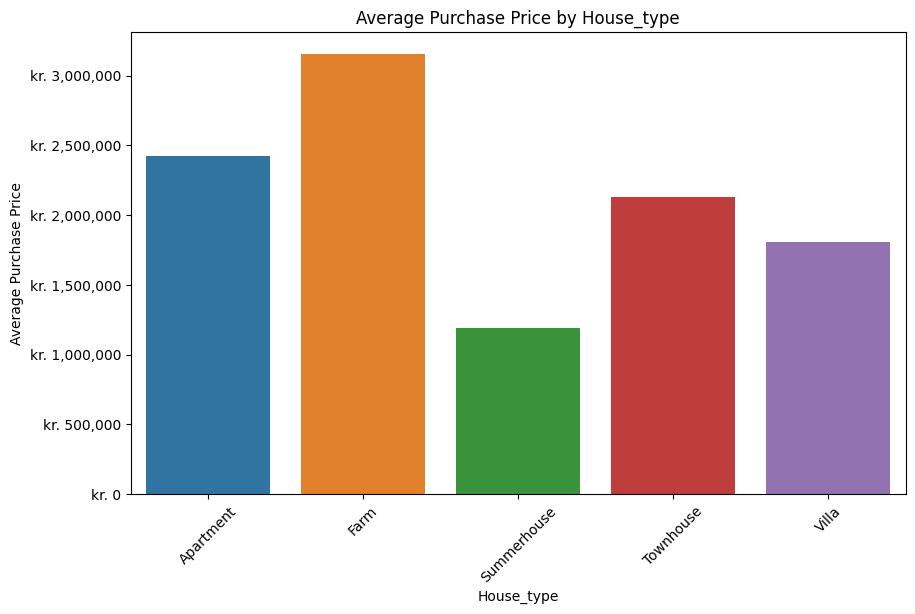

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



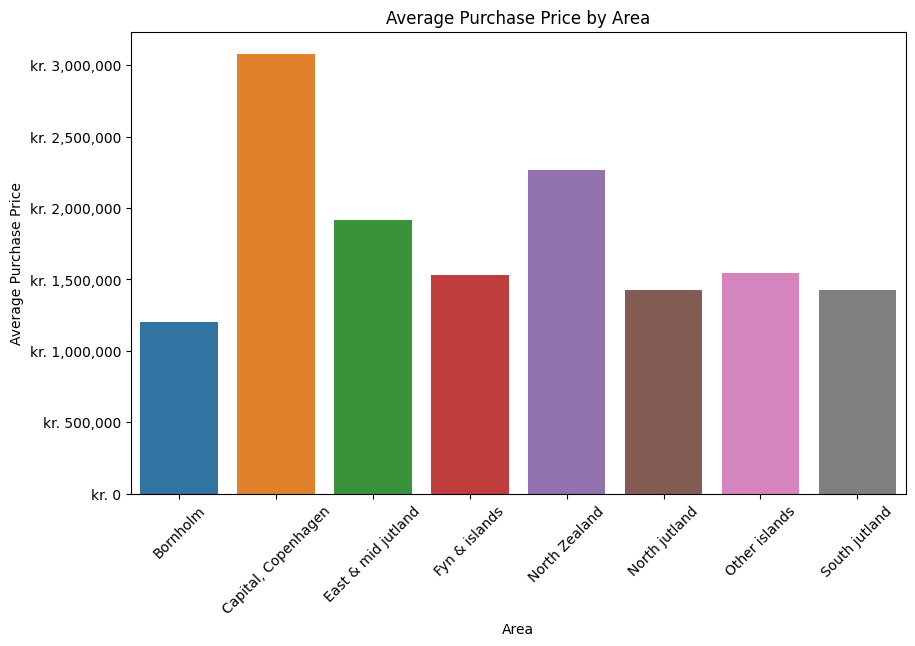

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



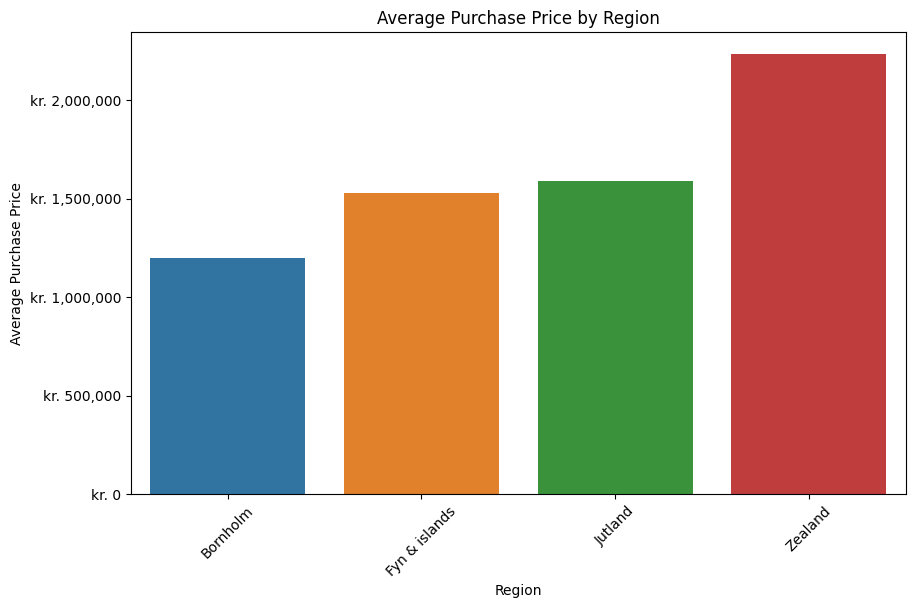

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Category columns to plot
categorical_columns = ['house_type', 'area', 'region']

def currency_format(x, pos):
    return f"kr. {x:,.0f}"

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Group by the categorical column and calculate the average purchase price
    avg_price_per_value = df.groupby(col, observed=True)['purchase_price'].mean().sort_values(ascending=False)    
    sns.barplot(x=avg_price_per_value.index, y=avg_price_per_value.values)    
    plt.title(f"Average Purchase Price by {col.capitalize()}")
    plt.xlabel(f"{col.capitalize()}")
    plt.ylabel("Average Purchase Price")   
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_format))    
    plt.xticks(rotation=45)
    plt.show()

In [11]:
df2 = df.drop(columns=['address', 'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%', 'quarter', 'date', 'sales_type','sqm_price','house_id'])
#dropping coulumns - I believe arent useful (but what do I know about housing) as well just sampling 120k rows so it doesnt use too many resources
df2 = df2.sample(n=90000, random_state=42)


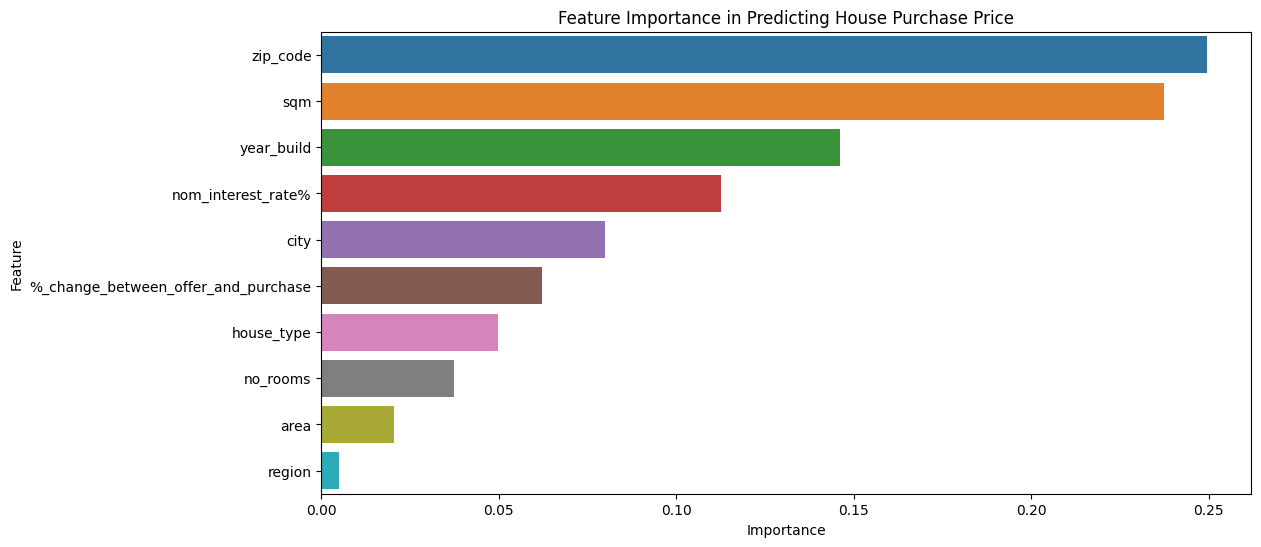

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df2['house_type'] = label_encoder.fit_transform(df2['house_type'])
df2['city'] = label_encoder.fit_transform(df2['city'])
df2['area'] = label_encoder.fit_transform(df2['area'])
df2['region'] = label_encoder.fit_transform(df2['region'])

X = df2.drop(columns=['purchase_price'])
y = df2['purchase_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting House Purchase Price')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



**What Have We Learnt**

*WHAT HOUSE LOCATION AND SQUARE METRES EFFECT HOUSE PRICING?* crazy I know. This project wasnt for me to do anything groundbreaking tasks but rather to just showcase some programming skills on a fun dataset.


I could have done extra stuff like breaking down on no_rooms.

In [13]:
#Most likely should have tested my model - would be useful innit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Reformat the error metrics
mae_in_millions = mae / 1_000_000  # Convert to millions of DKK
mse_in_billions = mse / 1_000_000_000  # Convert to billions of DKK
rmse_in_millions = rmse / 1_000_000  # Convert to millions of DKK

print("Model Evaluation Metrics (in DKK):")
print(f"Mean Absolute Error (MAE): {mae_in_millions:.2f} million DKK")
print(f"Mean Squared Error (MSE): {mse_in_billions:.2f} billion DKK")
print(f"Root Mean Squared Error (RMSE): {rmse_in_millions:.2f} million DKK")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics (in DKK):
Mean Absolute Error (MAE): 0.59 million DKK
Mean Squared Error (MSE): 1043.69 billion DKK
Root Mean Squared Error (RMSE): 1.02 million DKK
R-squared (R²): 0.56


HOLY - not a good model. but hey for my first self project model coding in a wild - I will take it. Can explore model improvements in the future. but right now I just want to post.